# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
# NOTE added an import
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_results = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
mouse_results.head()

# this doesn't display in the order as the starter indicates but the rows are valid

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [49]:
# Checking the number of mice.
len(mouse_results["Mouse ID"].unique())

249

In [50]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Create the dataframe that contains just duplicates
duplicates = mouse_results[mouse_results.duplicated(["Mouse ID", "Timepoint"], keep=False)]
# Print the list of unique mice from the duplicates df
dup_list = duplicates["Mouse ID"].unique()
dup_list

array(['g989'], dtype=object)

In [51]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_info = mouse_results[mouse_results["Mouse ID"].isin(dup_list)]
duplicate_mouse_info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [52]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_no_dup = mouse_results[mouse_results["Mouse ID"].isin(dup_list) == False]
mice_no_dup.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [53]:
# Checking the number of mice in the clean DataFrame.
len(mice_no_dup["Mouse ID"].unique())

248

## Summary Statistics

In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor = mice_no_dup.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor = mice_no_dup.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
var_tumor = mice_no_dup.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_dev_tumor = mice_no_dup.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
std_err_tumor = mice_no_dup.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
mice_stat_sum = pd.DataFrame({"Mean Tumor Volume": mean_tumor, "Median Tumor Volume": median_tumor, 
                              "Tumor Volume Variance": var_tumor, "Tumor Volume Std. Dev": std_dev_tumor, 
                              "Tumor Volume Std. Err": std_err_tumor})
mice_stat_sum

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [55]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# DataFrame.aggregate(func=None, axis=0, *args, **kwargs)
mice_stat_sum2 = mice_no_dup.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].aggregate(["mean", "median", "var", "std", "sem"])
mice_stat_sum2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [56]:
mice_no_dup.groupby(["Drug Regimen"])["Mouse ID"].count().sort_values(ascending=False)

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

Text(0, 0.5, '# of Observed Mouse Timepoints')

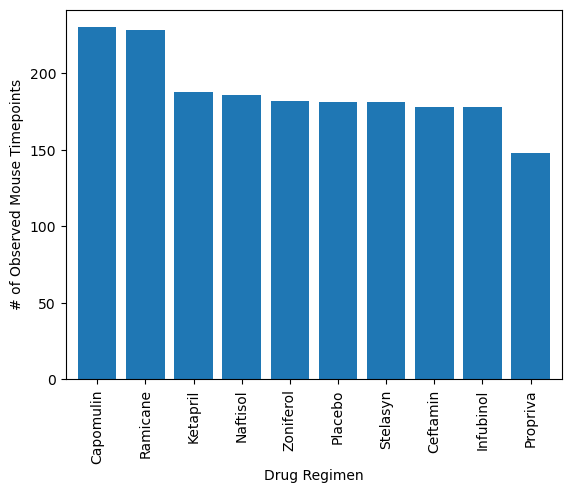

In [95]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Create sorted series that contains drug regimen and count
count_per_drug = mice_no_dup.groupby(["Drug Regimen"])["Mouse ID"].count().sort_values(ascending=False)
# Create plot and set y label since used Series
barplot = count_per_drug.plot(kind='bar', use_index=True, width=.8)
barplot.set_ylabel("# of Observed Mouse Timepoints")


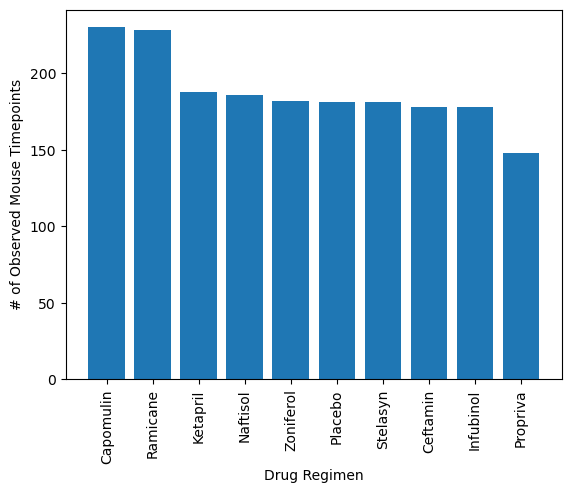

In [96]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Create sorted series that contains drug regimen and count
count_per_drug2 = mice_no_dup.groupby(["Drug Regimen"])["Mouse ID"].count().sort_values(ascending=False)
# Create plot 
x_axis = np.arange(len(count_per_drug2))
tick_locs = [value for value in x_axis]
plt.bar(x_axis, count_per_drug2)
plt.xticks(tick_locs, count_per_drug2.index, rotation='vertical')
# add axis labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

In [97]:
mice_no_dup.groupby(["Sex"])["Mouse ID"].count()

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Sex')

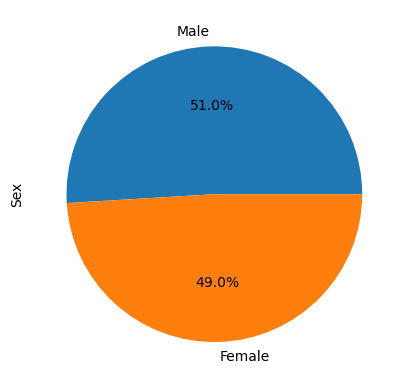

In [111]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Create sorted series
gender_count = mice_no_dup.groupby(["Sex"])["Mouse ID"].count().sort_values(ascending=False)
# Create plot 
pie_plot = gender_count.plot(kind='pie', autopct='%1.1f%%')
# Update label
pie_plot.set_ylabel("Sex")


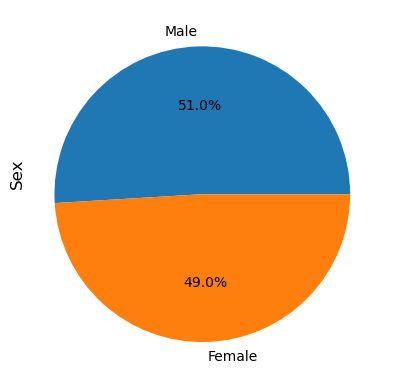

In [109]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create sorted series
gender_count2 = mice_no_dup.groupby(["Sex"])["Mouse ID"].count().sort_values(ascending=False)
# Create plot 
plt.pie(gender_count2, labels=gender_count2.index, autopct="%1.1f%%")
# Add title
plt.title("Sex", rotation='vertical', x=0, y = 0.5)

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


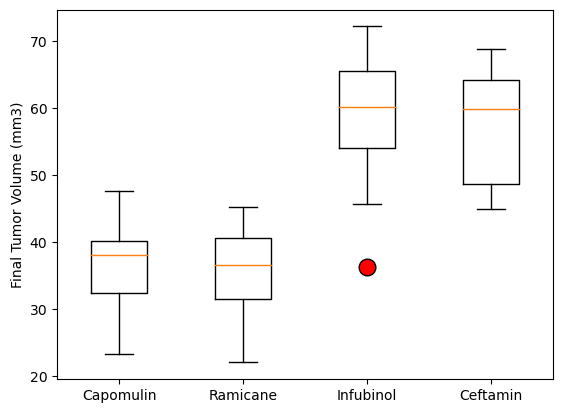

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

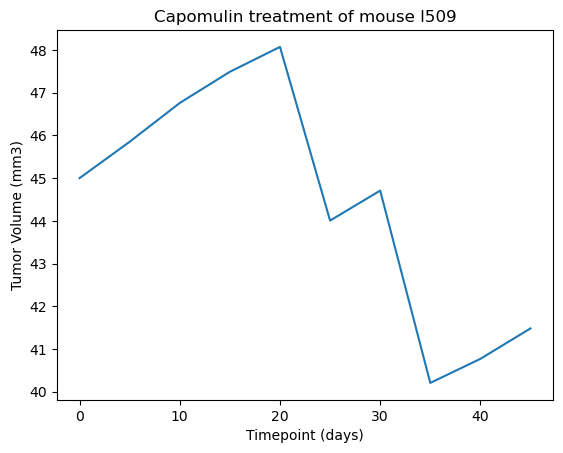

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


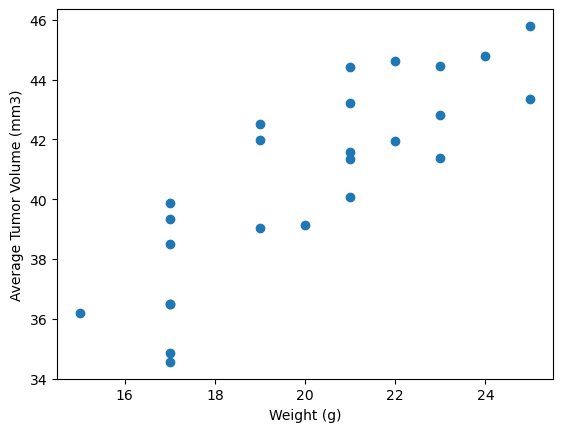

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


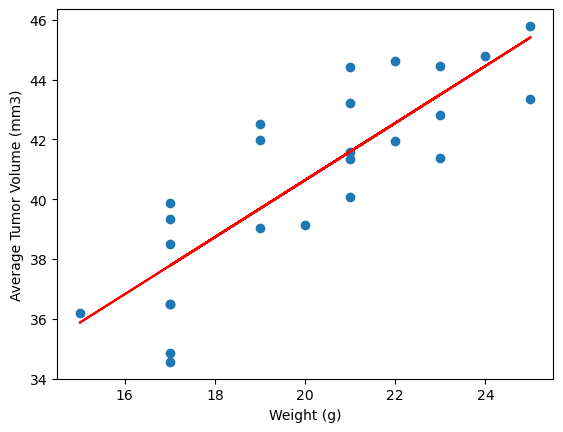

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
